In [1]:
# Step 2: Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Display settings
pd.set_option('display.max_columns', None)


In [2]:
# Step 3: Define company information

companies = ["Argos", "The Range"]

years = list(range(2018, 2026))

regions = [
    "London",
    "South East",
    "Midlands",
    "North West",
    "Scotland",
    "Wales"
]

age_groups = [
    "18-24",
    "25-34",
    "35-44",
    "45-54",
    "55-64",
    "65+"
]

genders = ["Male", "Female"]


In [3]:
# Step 4: Create sales dataset

data = []

for company in companies:
    for year in years:
        for region in regions:
            
            if company == "Argos":
                base_revenue = np.random.uniform(3500, 4500)
                profit_margin = np.random.uniform(3, 10)
            else:
                base_revenue = np.random.uniform(800, 1500)
                profit_margin = np.random.uniform(5, 15)
            
            customers = int(np.random.uniform(500000, 2000000))
            avg_order_value = np.random.uniform(25, 120)
            
            profit = base_revenue * profit_margin / 100
            
            data.append([
                company,
                year,
                region,
                round(base_revenue, 2),
                round(profit_margin, 2),
                round(profit, 2),
                customers,
                round(avg_order_value, 2)
            ])

sales_df = pd.DataFrame(data, columns=[
    "Company",
    "Year",
    "Region",
    "Revenue (£ millions)",
    "Profit Margin (%)",
    "Profit (£ millions)",
    "Customers",
    "Avg Order Value (£)"
])

sales_df.head()


,Company,Year,Region,Revenue (£ millions),Profit Margin (%),Profit (£ millions),Customers,Avg Order Value (£)
0,Argos,2018,London,3874.54,9.66,374.09,1597990,81.87
1,Argos,2018,South East,3656.02,4.09,149.60,587125,107.29
2,Argos,2018,Midlands,4101.12,7.96,326.31,530876,117.14
3,Argos,2018,North West,4332.44,4.49,194.37,772737,42.42
4,Argos,2018,Scotland,3804.24,6.67,253.87,1147917,52.67


In [4]:
# Step 5: Create demographics dataset

demo_data = []

for company in companies:
    for region in regions:
        for age in age_groups:
            for gender in genders:
                
                population = np.random.randint(50000, 300000)
                
                avg_spending = np.random.uniform(50, 500)
                
                demo_data.append([
                    company,
                    region,
                    age,
                    gender,
                    population,
                    round(avg_spending, 2)
                ])

demo_df = pd.DataFrame(demo_data, columns=[
    "Company",
    "Region",
    "Age Group",
    "Gender",
    "Customers",
    "Avg Spending (£)"
])

demo_df.head()


,Company,Region,Age Group,Gender,Customers,Avg Spending (£)
0,Argos,London,18-24,Male,155891,238.08
1,Argos,London,18-24,Female,270156,176.92
2,Argos,London,25-34,Male,94425,240.56
3,Argos,London,25-34,Female,216807,413.08
4,Argos,London,35-44,Male,164352,379.24


In [5]:
# Step 6: Save dataset

sales_df.to_csv("sales_dataset_argos_range.csv", index=False)
demo_df.to_csv("demographics_dataset_argos_range.csv", index=False)

print("Datasets saved successfully.")


Datasets saved successfully.


In [6]:
# Step 7: Total revenue by company

total_revenue = sales_df.groupby("Company")["Revenue (£ millions)"].sum()

print(total_revenue)


Company
Argos        188648.13
The Range     56904.47
Name: Revenue (£ millions), dtype: float64


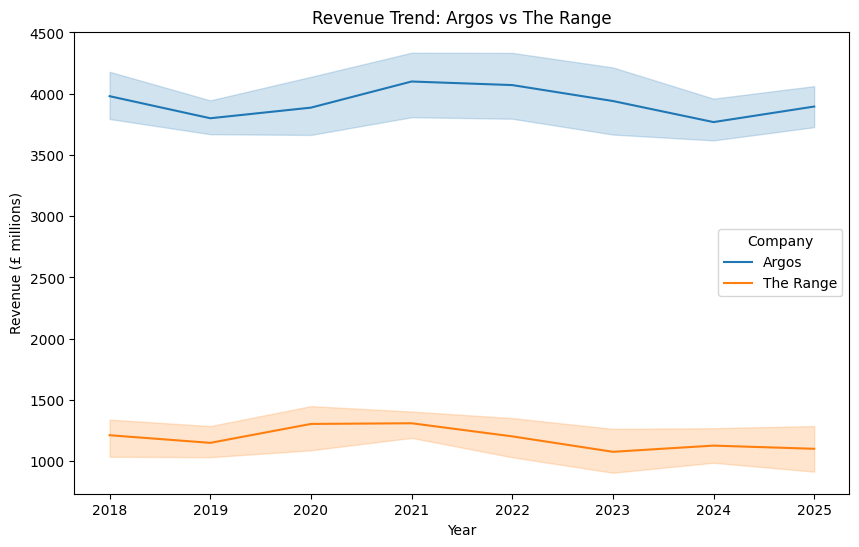

In [7]:
# Step 8: Revenue trend chart

plt.figure(figsize=(10,6))

sns.lineplot(
    data=sales_df,
    x="Year",
    y="Revenue (£ millions)",
    hue="Company",
    estimator="mean"
)

plt.title("Revenue Trend: Argos vs The Range")
plt.show()


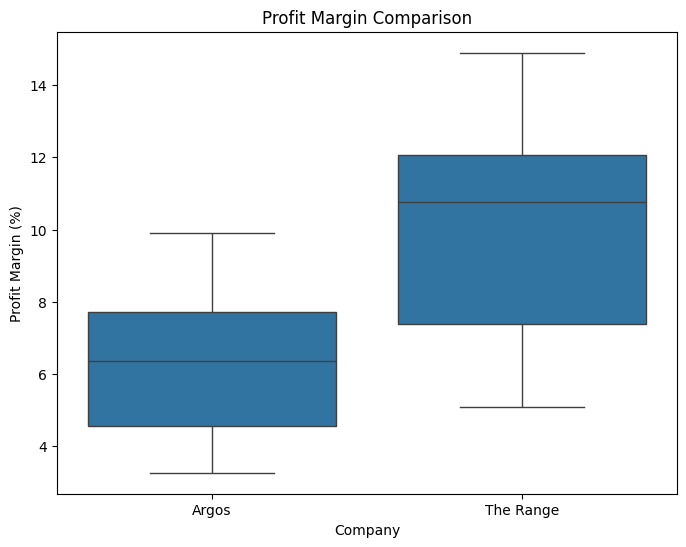

In [8]:
# Step 9: Profit margin comparison

plt.figure(figsize=(8,6))

sns.boxplot(
    data=sales_df,
    x="Company",
    y="Profit Margin (%)"
)

plt.title("Profit Margin Comparison")
plt.show()


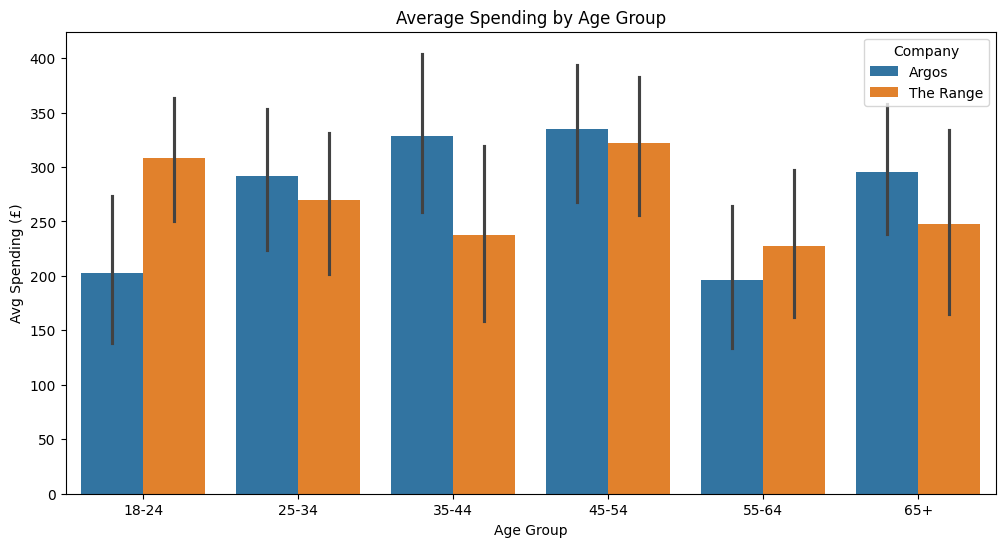

In [9]:
# Step 10: Demographics analysis

plt.figure(figsize=(12,6))

sns.barplot(
    data=demo_df,
    x="Age Group",
    y="Avg Spending (£)",
    hue="Company"
)

plt.title("Average Spending by Age Group")
plt.show()


In [10]:
# Step 11: Merge datasets for advanced analysis

merged_df = pd.merge(
    sales_df,
    demo_df,
    on=["Company", "Region"],
    how="inner"
)

merged_df.head()


,Company,Year,Region,Revenue (£ millions),Profit Margin (%),Profit (£ millions),Customers_x,Avg Order Value (£),Age Group,Gender,Customers_y,Avg Spending (£)
0,Argos,2018,London,3874.54,9.66,374.09,1597990,81.87,18-24,Male,155891,238.08
1,Argos,2018,London,3874.54,9.66,374.09,1597990,81.87,18-24,Female,270156,176.92
2,Argos,2018,London,3874.54,9.66,374.09,1597990,81.87,25-34,Male,94425,240.56
3,Argos,2018,London,3874.54,9.66,374.09,1597990,81.87,25-34,Female,216807,413.08
4,Argos,2018,London,3874.54,9.66,374.09,1597990,81.87,35-44,Male,164352,379.24


In [11]:
# Step 12: Prepare ML dataset

ml_df = sales_df.copy()

ml_df["Profitability Score"] = (
    ml_df["Profit Margin (%)"] * ml_df["Revenue (£ millions)"]
)

ml_df.head()


,Company,Year,Region,Revenue (£ millions),Profit Margin (%),Profit (£ millions),Customers,Avg Order Value (£),Profitability Score
0,Argos,2018,London,3874.54,9.66,374.09,1597990,81.87,37428.0564
1,Argos,2018,South East,3656.02,4.09,149.60,587125,107.29,14953.1218
2,Argos,2018,Midlands,4101.12,7.96,326.31,530876,117.14,32644.9152
3,Argos,2018,North West,4332.44,4.49,194.37,772737,42.42,19452.6556
4,Argos,2018,Scotland,3804.24,6.67,253.87,1147917,52.67,25374.2808
